# The simulation of BPAs generation


In the simulation setup, the multiagent system consists of resource provider agents and resource client agents. 
The client agent demands a resource provider agent for resources. However, the probability of providing a satisfying resource is fixed by P(P is in [0,1]). However, some round it decides to go from genuine to malicious, or the other way around. We have to check if the proposed method can have a quick response to the sudden change in this experiment.

1. The required modules

In [1]:
import random
import math
import matplotlib.pyplot as plt

2. The multiagent system consist of two agent classes, one is the resource provider agent and another is resource client agents

In [2]:
class Provider():
    def __init__(self,ID,performance):
        self.ID=ID  #Each provider agent has an ID
        self.performance=performance #probability of successfully interaction;or satisfying resources 
        
class Client():
    def __init__(self,ID): ###设置每个目击者的诚实度
        self.ID=ID
        self.Memory_DS={}
        self.Memory_BRS={} 

3. Then is the multiagent system for experiments. The MAS can generate agents, run tests, and change resource providers' performance, namely from genuine to malicious. 

In [9]:
class MAS():
    def __init__(self,Provider_Number,Witness_Number,pp):
        self.Provider_Number=Provider_Number
        self.Witness_Number=Witness_Number
        self.Provider_List=[] #trustee agents 
        self.Client_List=[] # adviser agent
        self.pp=pp
        self.Generate_Agents()
    
    def Generate_Agents(self): 
        i,j=1,1
        while i<=self.Provider_Number:
            self.Provider_List.append(Provider(i,self.pp))#random.choice(self.pp)))
            i+=1        
        while j<=self.Witness_Number:
            self.Client_List.append(Client(j))
            j+=1
        return
     
    def Run_Test(self):
        for c in self.Client_List:
            A,B,C=self.ineract_once(c) 
        return A,B,C
    
    def ineract_once(self,client):
        provider=random.choice(self.Provider_List) #randomly selecting a resource provider agent
        
        if provider in client.Memory_DS:
            Details=client.Memory_DS[provider]
        else:
            Details=(0,0,0) #前三个是最近4次，第五个是次数    （4个结果，一个交互次数）
            
        if provider in client.Memory_BRS:
            result=client.Memory_BRS[provider]
        else:
            result=[0,0]
            
        #CHECK INTERACTIIVE RESULT
        if random.random()<provider.performance:
            CurrentP=1
            S=result[0]
            result[0]=S+1
        else:
            CurrentP=0
            F=result[1]
            result[1]=F+1
            
        #先求Difference
        if Details[2]==0:
            Difference,History=0,0
            SatisP=CurrentP
        elif Details[2]>=2: 
            History=sum(list(Details[0:2]))/2
            Difference=abs(History-CurrentP)
            c=math.exp(-1+Difference)/(math.exp(-1+Difference)+math.exp(1))
            SatisP=(1-c)*History+c*CurrentP
        else:
            History=sum(list(Details)[0:(Details[2])])/(Details[2])
            Difference=abs(History-CurrentP)
            c=math.exp(-1+Difference)/(math.exp(-1+Difference)+math.exp(1))
            SatisP=(1-c)*History+c*CurrentP
        Revised_Details=(SatisP,Details[0],Details[2]+1)        
        client.Memory_DS[provider]=Revised_Details
        client.Memory_BRS[provider]=result
        return provider.performance, Revised_Details[0], (result[0])/(sum(result)+1)
    
    def change_performance(self):
        for pro in self.Provider_List:
            pp=pro.performance
            pro.performance=1-pp
        return   

# Run tests

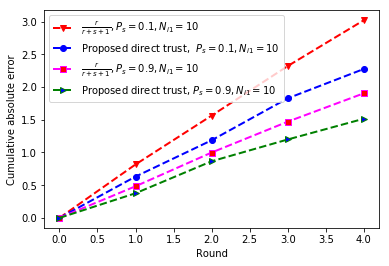

In [43]:
YES,NO=0,0
for i in range(0,2):
    w_num,p_num,rd,r_num=1,1,1,20 #we use one resource client, one resource provider, and run 20 interactions,and the provider changes it performance in round 10
    '''
    We can also change r_num=200 to see the result
    '''
    if i==0:
        pp=0.1
    elif i==1:
        pp=0.9
    test=MAS(p_num,w_num,pp)
    AA,BB,CC=[],[],[] #To present the fixed probability, the accumulabe absolute error, and r/(r+s+1) respectively
    while rd<r_num:
        A,B,C=test.Run_Test()
        if rd==round(r_num/2, 0):
            test.change_performance()
        if rd>r_num/2: #we record the simulation result when the provider changed its performance
            AA.append(A)
            BB.append(B)
            CC.append(C)
        rd=rd+1  
    #Draw figures
    X=[abs(BB[i]-AA[i]) for i in range(0,len(AA))]
    Y=[abs(CC[i]-AA[i]) for i in range(0,len(AA))]
    XX=[sum(X[0:j]) for j in range(0,5)]
    YY=[sum(Y[0:j]) for j in range(0,5)]
    if sum(XX)>=sum(YY):
        NO= NO+1
    else:
        YES=YES+1
    if pp==0.1:
        plt.plot([I for I in range(len(YY))], YY, color="r", linestyle="--",marker = 'v',markerfacecolor='r',linewidth=2.0, label=r"$\frac{r}{r+s+1}, P_{s}=0.1, N_{i1}=10$")
        plt.plot([I for I in range(len(XX))], XX, color="b", linestyle="--",marker = 'o',markerfacecolor='b',linewidth=2.0, label=r'Proposed direct trust,  $P_{s}=0.1, N_{i1}=10$')
    elif pp==0.9:
        plt.plot([I for I in range(len(YY))], YY, color="fuchsia", linestyle="--",marker = 's',markerfacecolor='r',linewidth=2.0, label=r"$\frac{r}{r+s+1}, P_{s}=0.9, N_{i1}=10$")
        plt.plot([I for I in range(len(XX))], XX, color="g", linestyle="--",marker = '>',markerfacecolor='b',linewidth=2.0, label=r"Proposed direct trust, $P_{s}=0.9, N_{i1}=10$")
    plt.legend()
plt.xlabel("Round")
plt.ylabel("Cumulative absolute error")
plt.show()

Then we check the rate of winning, we run 1000 times, if the accumulated 5-round absolute errors obtained by the proposed method is bigger, we say it is a win. After that we can receive the rate of win. 

In [45]:
YES,NO=0,0
for i in range(0,1000):
    w_num,p_num,rd,r_num,pp=1,1,1,20,0.9  #we use one resource client, one resource provider, and run 20 interactions,and the provider changes it performance in round 1
    '''We can also change r_num=200 and pp=0.7 to have more results.'''
    test=MAS(p_num,w_num,pp)
    AA,BB,CC=[],[],[] #To present the fixed probability, the accumulabe absolute error, and r/(r+s+1) respectively
    while rd<r_num:
        A,B,C=test.Run_Test()
        if rd==round(r_num/2, 0):
            test.change_performance()
        if rd>r_num/2: #we record the simulation result when the provider changed its performance
            AA.append(A)
            BB.append(B)
            CC.append(C)
        rd=rd+1  
    X=[abs(BB[i]-AA[i]) for i in range(0,len(AA))]
    Y=[abs(CC[i]-AA[i]) for i in range(0,len(AA))]
    XX=[sum(X[0:j]) for j in range(0,5)]
    YY=[sum(Y[0:j]) for j in range(0,5)]
    if XX[-1]>YY[-1]:
        NO= NO+1
    else:
        YES=YES+1    
print("Rate of being better",YES/(NO+YES),YES,NO)


Rate of being better 0.988 988 12
